# Daily Temperature of Major Cities

*How is the average temperature of the world changing over time?*

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
df = pd.read_csv("dataset/city_temperature.csv")
df.head()

C:\Users\franc\AppData\Local\Temp\ipykernel_25108\2073215155.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset/city_temperature.csv")


Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9

**O dataset mostra as colunas do local (Continente, Pais, estado e cidade) e de data (Dia, mês e ano)**

## Análise exploratória

In [3]:
df.shape

(2906327, 8)

In [4]:
df.describe()

Month           Day          Year  AvgTemperature
count  2.906327e+06  2.906327e+06  2.906327e+06    2.906327e+06
mean   6.469163e+00  1.571682e+01  2.006624e+03    5.600492e+01
std    3.456489e+00  8.800534e+00  2.338226e+01    3.212359e+01
min    1.000000e+00  0.000000e+00  2.000000e+02   -9.900000e+01
25%    3.000000e+00  8.000000e+00  2.001000e+03    4.580000e+01
50%    6.000000e+00  1.600000e+01  2.007000e+03    6.250000e+01
75%    9.000000e+00  2.300000e+01  2.013000e+03    7.550000e+01
max    1.200000e+01  3.100000e+01  2.020000e+03    1.100000e+02

*Dias com valor 0?*

In [5]:
df[df["Day"] == 0]

Region        Country State         City  \
82774                               Africa         Guinea   NaN      Conakry   
85697                               Africa         Guinea   NaN      Conakry   
92041                               Africa  Guinea-Bissau   NaN       Bissau   
146077                              Africa         Malawi   NaN     Lilongwe   
177862                              Africa        Nigeria   NaN        Lagos   
241159                              Africa         Uganda   NaN      Kampala   
1209901                      North America         Mexico   NaN  Guadalajara   
1333910  South/Central America & Carribean           Cuba   NaN       Havana   

         Month  Day  Year  AvgTemperature  
82774        3    0  2008           -99.0  
85697        3    0  2016           -99.0  
92041        3    0  2008           -99.0  
146077       3    0  2012           -99.0  
177862       3    0  2008           -99.0  
241159       3    0  2012           -99.0  
1209901      3    0  2012           -99.0  
1333910      3    0  2008           -99.0

*Cofunsão no ultimo dia do mês de fevereiro ou primeiro de março*

In [6]:
df.loc[df["Day"] == 0, "Day"] = 1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [8]:
invalid_dates = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')
invalid_rows = df[invalid_dates.isna()]
invalid_rows

Region     Country State           City  Month  Day  Year  \
58204           Africa    Ethiopia   NaN    Addis Ababa     12   29   201   
58205           Africa    Ethiopia   NaN    Addis Ababa     12   30   201   
58206           Africa    Ethiopia   NaN    Addis Ababa     12   31   201   
112002          Africa       Kenya   NaN        Nairobi     12   29   201   
112003          Africa       Kenya   NaN        Nairobi     12   30   201   
112004          Africa       Kenya   NaN        Nairobi     12   31   201   
155025          Africa  Mozambique   NaN         Maputo     12   29   201   
155026          Africa  Mozambique   NaN         Maputo     12   30   201   
155027          Africa  Mozambique   NaN         Maputo     12   31   201   
232927          Africa    Tanzania   NaN  Dar Es Salaam     12   29   201   
232928          Africa    Tanzania   NaN  Dar Es Salaam     12   30   201   
232929          Africa    Tanzania   NaN  Dar Es Salaam     12   31   201   
743393          Europe     Germany   NaN        Hamburg     12   29   200   
743394          Europe     Germany   NaN        Hamburg     12   30   200   
743395          Europe     Germany   NaN        Hamburg     12   31   200   
743788          Europe     Germany   NaN        Hamburg     12   29   200   
743789          Europe     Germany   NaN        Hamburg     12   30   200   
743790          Europe     Germany   NaN        Hamburg     12   31   200   
744183          Europe     Germany   NaN        Hamburg     12   29   201   
744184          Europe     Germany   NaN        Hamburg     12   30   201   
744185          Europe     Germany   NaN        Hamburg     12   31   201   
744943          Europe     Germany   NaN        Hamburg     12   29   201   
744944          Europe     Germany   NaN        Hamburg     12   30   201   
744945          Europe     Germany   NaN        Hamburg     12   31   201   
745338          Europe     Germany   NaN        Hamburg     12   29   201   
745339          Europe     Germany   NaN        Hamburg     12   30   201   
745340          Europe     Germany   NaN        Hamburg     12   31   201   
753402          Europe     Germany   NaN         Munich     12   29   201   
753403          Europe     Germany   NaN         Munich     12   30   201   
753404          Europe     Germany   NaN         Munich     12   31   201   
754500          Europe     Germany   NaN         Munich     12   29   201   
754501          Europe     Germany   NaN         Munich     12   30   201   
754502          Europe     Germany   NaN         Munich     12   31   201   
755232          Europe     Germany   NaN         Munich     12   29   201   
755233          Europe     Germany   NaN         Munich     12   30   201   
755234          Europe     Germany   NaN         Munich     12   31   201   
845937          Europe      Norway   NaN           Oslo     12   29   200   
845938          Europe      Norway   NaN           Oslo     12   30   200   
845939          Europe      Norway   NaN           Oslo     12   31   200   
1212429  North America      Mexico   NaN    Guadalajara     12   29   201   
1212430  North America      Mexico   NaN    Guadalajara     12   30   201   
1212431  North America      Mexico   NaN    Guadalajara     12   31   201   

         AvgTemperature  
58204             -99.0  
58205             -99.0  
58206             -99.0  
112002            -99.0  
112003            -99.0  
112004            -99.0  
155025            -99.0  
155026            -99.0  
155027            -99.0  
232927            -99.0  
232928            -99.0  
232929            -99.0  
743393            -99.0  
743394            -99.0  
743395            -99.0  
743788            -99.0  
743789            -99.0  
743790            -99.0  
744183            -99.0  
744184            -99.0  
744185            -99.0  
744943            -99.0  
744944            -99.0  
744945            -99.0  
745338            -99.0  
745339            -99.0  
74

**Alguns anos estão colocados de forma incorreta**

In [9]:
df.loc[df["Year"] == 201, "Year"] = 2001
df.loc[df["Year"] == 200, "Year"] = 2000

**Criando coluna de data (Dia, mês e ano**)

In [10]:
df["Date"] = pd.to_datetime(df[['Year', 'Month', 'Day']], format="%d/%m/%Y")

In [11]:
df.head()

Region  Country State     City  Month  Day  Year  AvgTemperature       Date
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2 1995-01-01
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4 1995-01-02
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8 1995-01-03
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4 1995-01-04
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9 1995-01-05

In [12]:
df.Country.unique()

array(['Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo',
       'Egypt', 'Ethiopia', 'Gabon', 'Gambia', 'Guinea', 'Guinea-Bissau',
       'Ivory Coast', 'Kenya', 'Morocco', 'Madagascar', 'Mauritania',
       'Malawi', 'Mozambique', 'Namibia', 'Nigeria', 'Senegal',
       'Sierra Leone', 'South Africa', 'Togo', 'Tunisia', 'Tanzania',
       'Uganda', 'Zambia', 'Bangladesh', 'China', 'Hong Kong', 'India',
       'Indonesia', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
       'Malaysia', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea',
       'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka',
       'Taiwan', 'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan',
       'Vietnam', 'Australia', 'New Zealand', 'Albania', 'Austria',
       'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Ma

## Serie temporal de um país (Portugal - Lisboa)

### Pré-processamento

**Dataset com dados de Lisboa (Portugal)**

In [13]:
df_pt = df[df["Country"] == "Portugal"]
df_pt.head()

Region   Country State    City  Month  Day  Year  AvgTemperature  \
859724  Europe  Portugal   NaN  Lisbon      1    1  1995            53.5   
859725  Europe  Portugal   NaN  Lisbon      1    2  1995            46.9   
859726  Europe  Portugal   NaN  Lisbon      1    3  1995            45.8   
859727  Europe  Portugal   NaN  Lisbon      1    4  1995            53.3   
859728  Europe  Portugal   NaN  Lisbon      1    5  1995            56.2   

             Date  
859724 1995-01-01  
859725 1995-01-02  
859726 1995-01-03  
859727 1995-01-04  
859728 1995-01-05

In [14]:
df_pt["City"].unique()

array(['Lisbon'], dtype=object)

**Dataframe de series temporais**

In [15]:
df_pt = df_pt[["Date", "AvgTemperature"]]

In [16]:
import plotly.express as px

fig = px.line(df_pt, x='Date', y='AvgTemperature', 
              title='Temperatura ao Longo do Tempo',
              labels={'Data': 'Data', 'AvgTemperature': 'Temperatura (F)'})

# Exibir o gráfico interativo
fig.show()

*Menor temperatura já registrada em portugal foi de 14º por isso vou colocar a temperatura do dia anterior, dados com -99°*

**Temperaturas abaixo do normal**

In [17]:
df_pt[df_pt['AvgTemperature'] < 6.8]

Date  AvgTemperature
860658 1997-07-23           -99.0
860908 1998-03-30           -99.0
860913 1998-04-04           -99.0
860914 1998-04-05           -99.0
861177 1998-12-24           -99.0
861183 1998-12-30           -99.0
861184 1998-12-31           -99.0
861194 1999-01-10           -99.0
861325 1999-05-21           -99.0
862449 2002-06-18           -99.0
862450 2002-06-19           -99.0
862451 2002-06-20           -99.0
862452 2002-06-21           -99.0
863033 2004-01-23           -99.0
863669 2005-10-20           -99.0
863928 2006-07-06           -99.0
864256 2007-05-30           -99.0
864346 2007-08-28           -99.0
864447 2007-12-07           -99.0
864739 2008-09-24           -99.0
864936 2009-04-09           -99.0
865895 2011-11-24           -99.0
866251 2012-11-14           -99.0
866476 2013-06-27           -99.0
866610 2013-11-08           -99.0
866700 2014-02-06           -99.0
867100 2015-03-13           -99.0
867393 2015-12-30           -99.0
867394 2015-12-31           -99.0
867464 2016-03-10           -99.0
867520 2016-05-05           -99.0
867659 2016-09-21           -99.0
867710 2016-11-11           -99.0
868129 2018-01-04           -99.0
868443 2018-11-14           -99.0
868444 2018-11-15           -99.0
868446 2018-11-17           -99.0
868513 2019-01-23           -99.0
868604 2019-04-24           -99.0
868626 2019-05-16           -99.0
868627 2019-05-17           -99.0
868628 2019-05-18           -99.0
868629 2019-05-19           -99.0
868886 2020-01-31           -99.0

**Removendo temperaturas abaixo da minima já registrada**

In [18]:
df_pt.sort_values(by='Date', inplace=True)

df_pt.loc[df_pt['AvgTemperature'] < 6.8, 'AvgTemperature'] = None

df_pt['AvgTemperature'].fillna(method='ffill', inplace=True)



C:\Users\franc\AppData\Local\Temp\ipykernel_25108\519809923.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\franc\AppData\Local\Temp\ipykernel_25108\519809923.py:5: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [19]:
df_pt[df_pt['AvgTemperature'] < 6.8]

Empty DataFrame
Columns: [Date, AvgTemperature]
Index: []

**Temperatura durante um ano**

In [20]:
import plotly.express as px

fig = px.line(df_pt[df_pt["Date"].dt.year == 2018], x='Date', y='AvgTemperature', 
              title='Temperatura ao Longo do Tempo',
              labels={'Data': 'Data', 'AvgTemperature': 'Temperatura (F)'})

fig.show()

### Estacionariedade

In [21]:
from statsmodels.tsa.stattools import adfuller, kpss

def estac(df):

  adf = adfuller(df)
  print(f'Valor-p do Teste ADF: {adf[1]:.4f}')
  if adf[1] > 0.05:
    print('Não rejeitar a Hipótese Nula: a série não é estacionária\n')
  else:
    print('Rejeitar a Hipótese Nula: a série é estacionária\n')

  kpss_saida = kpss(df)
  print(f'Valor-p do Teste KPSS: {kpss_saida[1]:.4f}')
  if kpss_saida[1] > 0.05:
    print('Não rejeitar a Hipótese Nula: a série é estacionária\n')
  else:
    print('Rejeitar a Hipótese Nula: a série não é estacionária\n')

In [22]:
estac(df_pt.set_index("Date"))

Valor-p do Teste ADF: 0.0000
Rejeitar a Hipótese Nula: a série é estacionária

Valor-p do Teste KPSS: 0.1000
Não rejeitar a Hipótese Nula: a série é estacionária



C:\Users\franc\AppData\Local\Temp\ipykernel_25108\460481291.py:12: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




### Docomposição

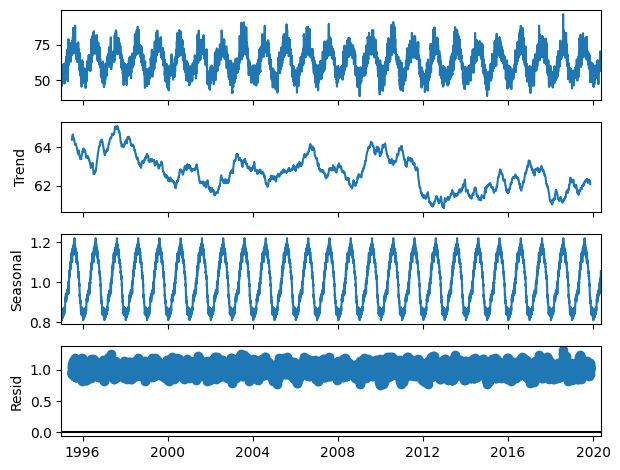

In [23]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df_pt.set_index("Date"), model='multiplicative', period=365) 

# Plotando as componentes
fig = decomposition.plot()
plt.show()

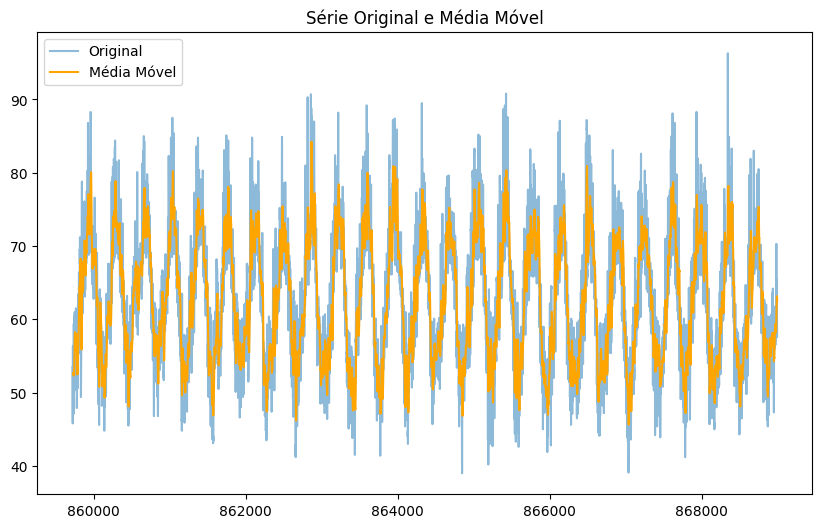

In [24]:

df_pt['media_movel'] = df_pt['AvgTemperature'].rolling(window=12).mean() 

plt.figure(figsize=(10, 6))
plt.plot(df_pt['AvgTemperature'], label='Original', alpha=0.5)
plt.plot(df_pt['media_movel'], label='Média Móvel', color='orange')
plt.legend()
plt.title('Série Original e Média Móvel')
plt.show()


In [25]:
df_anual = df_pt[df_pt["Date"].dt.year == 2018].groupby(df_pt["Date"].dt.month).mean()
df_anual["Date"] = df_anual["Date"].dt.month
df_anual.head()

Date  AvgTemperature  media_movel
Date                                   
1        1       52.619355    53.154301
2        2       51.421429    51.366667
3        3       53.787097    53.720699
4        4       56.880000    56.218056
5        5       61.616129    60.930914

<Axes: xlabel='Date', ylabel='AvgTemperature'>

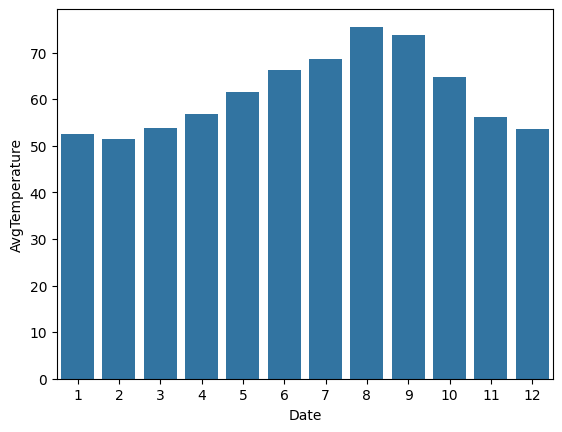

In [26]:
sns.barplot(df_anual, x=df_anual["Date"], y=df_anual["AvgTemperature"])

## Treinamento prophet

In [27]:
from prophet import Prophet

c:\Users\franc\Documents\dataScience\temperature-time-series\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



### Entendendo componentes

**Criando dataframe prophet**

In [28]:
df_prophet = pd.DataFrame()

df_prophet['ds'] = df_pt['Date']
df_prophet['y'] = df_pt['AvgTemperature']

df_prophet.reset_index(inplace=True, drop=True)
df_prophet.head()

ds     y
0 1995-01-01  53.5
1 1995-01-02  46.9
2 1995-01-03  45.8
3 1995-01-04  53.3
4 1995-01-05  56.2

**Treinando modelo**

In [29]:
np.random.seed(4587)

model = Prophet()
model.fit(df_prophet)

10:03:08 - cmdstanpy - INFO - Chain [1] start processing
10:03:09 - cmdstanpy - INFO - Chain [1] done processing


**Realizando previão**

In [30]:
pred = model.predict()

In [31]:
from prophet.plot import plot_plotly
fig = plot_plotly(model, pred)
fig.show()

**Componentes**

In [32]:
from prophet.plot import plot_components_plotly

plot_components_plotly(model, pred)

### Avaliando modelo

**Separando dataset de treino e outro de teste**

In [33]:
train_size = int(len(df_prophet) * 0.8)

In [34]:
train = pd.DataFrame()

train['ds'] = df_prophet['ds'][:train_size] # 80% treino
train['y'] = df_prophet['y'][:train_size]

test = pd.DataFrame()

test['ds'] = df_prophet['ds'][train_size:] # 20% teste
test['y'] = df_prophet['y'][train_size:]
test.shape

(1854, 2)

**Treinamento e predict do tempo de teste**

In [35]:
model = Prophet()

model.fit(train)

future = model.make_future_dataframe(periods=1854, freq='D')
pred = model.predict(future)

10:03:12 - cmdstanpy - INFO - Chain [1] start processing
10:03:13 - cmdstanpy - INFO - Chain [1] done processing


**Comparação do predict com real**

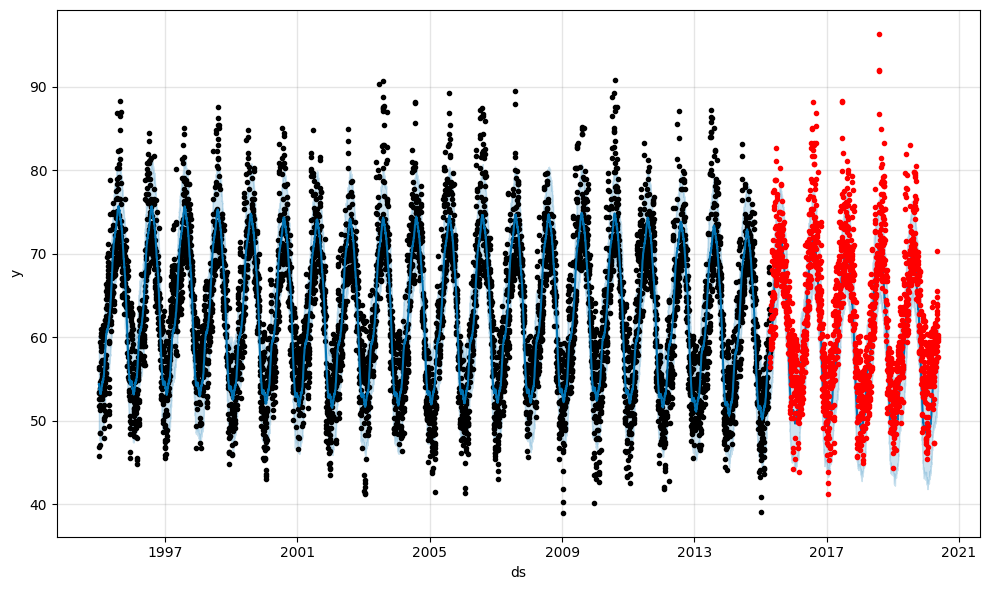

In [36]:
fig1 = model.plot(pred)

import matplotlib.pyplot as plt
plt.plot(test['ds'], test['y'], '.r')
plt.show()

In [37]:
df_pred = pred[['ds', 'yhat']]
df_comp = pd.merge(df_pred, test, on='ds', how='inner')
df_comp

ds       yhat     y
0    2015-04-18  58.310410  56.4
1    2015-04-19  58.343173  57.1
2    2015-04-20  58.435651  57.7
3    2015-04-21  58.696326  60.7
4    2015-04-22  58.903323  60.9
...         ...        ...   ...
1849 2020-05-09  58.424925  59.8
1850 2020-05-10  58.547089  60.0
1851 2020-05-11  58.732473  60.3
1852 2020-05-12  59.089845  59.6
1853 2020-05-13  59.397489  57.6

[1854 rows x 3 columns]

**Metricas Mean Squared Error** e **Mean Absolute Error**

In [38]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

rmse = root_mean_squared_error(df_comp['y'], df_comp['yhat']).round(2)
mae = mean_absolute_error(df_comp['y'], df_comp['yhat']).round(2)
print(f'MSE: {mae}, RMSE: {rmse}')

MSE: 3.95, RMSE: 5.19


**R2 Score**

In [39]:
from sklearn.metrics import r2_score

r2_score(df_comp['y'],df_comp['yhat'])

0.6277243040796888

### Avaliando a performance para 1 ano

In [40]:
future = model.make_future_dataframe(periods=365, freq='D')
pred = model.predict(future)

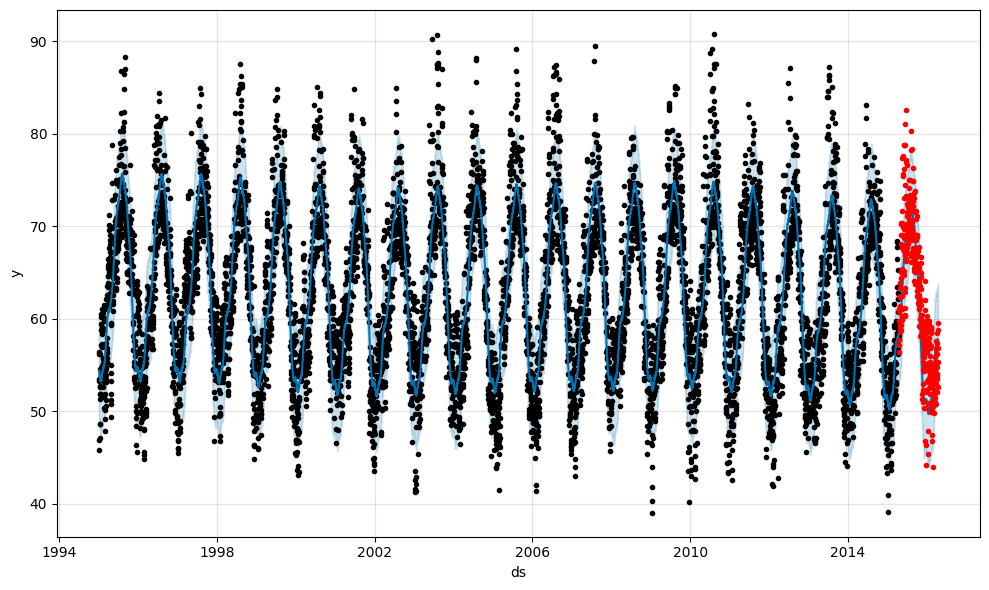

In [41]:
fig1 = model.plot(pred)

import matplotlib.pyplot as plt
plt.plot(test['ds'][:365], test['y'][:365], '.r')
plt.show()

In [42]:
df_pred = pred[['ds', 'yhat']]
df_comp = pd.merge(df_pred, test[:365], on='ds', how='inner')
df_comp

ds       yhat     y
0   2015-04-18  58.310410  56.4
1   2015-04-19  58.343173  57.1
2   2015-04-20  58.435651  57.7
3   2015-04-21  58.696326  60.7
4   2015-04-22  58.903323  60.9
..         ...        ...   ...
360 2016-04-11  57.385757  52.6
361 2016-04-12  57.611881  55.3
362 2016-04-13  57.786223  56.8
363 2016-04-14  57.793029  58.8
364 2016-04-15  57.758010  59.5

[365 rows x 3 columns]

In [43]:
rmse = root_mean_squared_error(df_comp['y'], df_comp['yhat']).round(2)
mae = mean_absolute_error(df_comp['y'], df_comp['yhat']).round(2)
print(f'MSE: {mae}, RMSE: {rmse}')

MSE: 3.6, RMSE: 4.58


## Utilizando DARTS

### Sazonalidade e decomposição de series temporais

**Brasil**

In [44]:
df_br = df[df['Country'] == 'Brazil']
df_br.head()

Region Country State      City  Month  \
1282775  South/Central America & Carribean  Brazil   NaN  Brasilia      1   
1282776  South/Central America & Carribean  Brazil   NaN  Brasilia      1   
1282777  South/Central America & Carribean  Brazil   NaN  Brasilia      1   
1282778  South/Central America & Carribean  Brazil   NaN  Brasilia      1   
1282779  South/Central America & Carribean  Brazil   NaN  Brasilia      1   

         Day  Year  AvgTemperature       Date  
1282775    1  1995            70.9 1995-01-01  
1282776    2  1995            71.7 1995-01-02  
1282777    3  1995            71.2 1995-01-03  
1282778    4  1995            69.2 1995-01-04  
1282779    5  1995            68.5 1995-01-05

**Verificando distribuição geral**

In [45]:
df_br["City"].unique()

array(['Brasilia', 'Rio de Janeiro', 'Sao Paulo'], dtype=object)

In [46]:
import plotly.express as px

fig = px.line(df_br, x='Date', y='AvgTemperature', 
              title='Temperatura ao Longo do Tempo',
              labels={'Data': 'Data', 'AvgTemperature': 'Temperatura (F)'})

# Exibir o gráfico interativo
fig.show()

**Trantando dados inconsistentes**: Temperatura de -99°

In [47]:
df_br.sort_values(by='Date', inplace=True)

df_br.loc[df_br['AvgTemperature'] < 6.8, 'AvgTemperature'] = None

df_br['AvgTemperature'].fillna(method='ffill', inplace=True)

C:\Users\franc\AppData\Local\Temp\ipykernel_25108\390323612.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\franc\AppData\Local\Temp\ipykernel_25108\390323612.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\franc\AppData\Local\Temp\ipykernel_25108\390323612.py:5: FutureWarning:

Series.fillna with 'method' is deprecat

In [48]:
df_br.loc[df_br['AvgTemperature'] < 6.8, 'AvgTemperature']

Series([], Name: AvgTemperature, dtype: float64)

**Agrupando as cidades com a media**

In [49]:
df_br = df_br.groupby(["Country", "Date"])["AvgTemperature"].mean()

In [50]:
df_br = df_br.reset_index()

In [51]:
df_br.head()

Country       Date  AvgTemperature
0  Brazil 1995-01-01       75.800000
1  Brazil 1995-01-02       76.233333
2  Brazil 1995-01-03       75.800000
3  Brazil 1995-01-04       75.133333
4  Brazil 1995-01-05       76.166667

**Componentes da serie temporal**

In [52]:
from darts import TimeSeries
from darts.utils.statistics import check_seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
series = TimeSeries.from_dataframe(df_br, 'Date', 'AvgTemperature')

In [54]:
pd_series = series.pd_series()

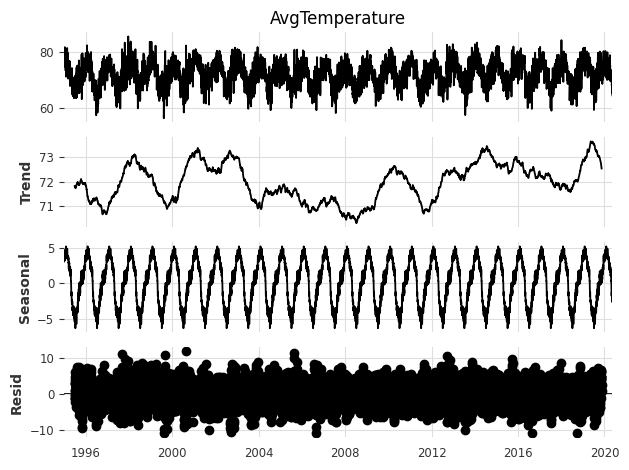

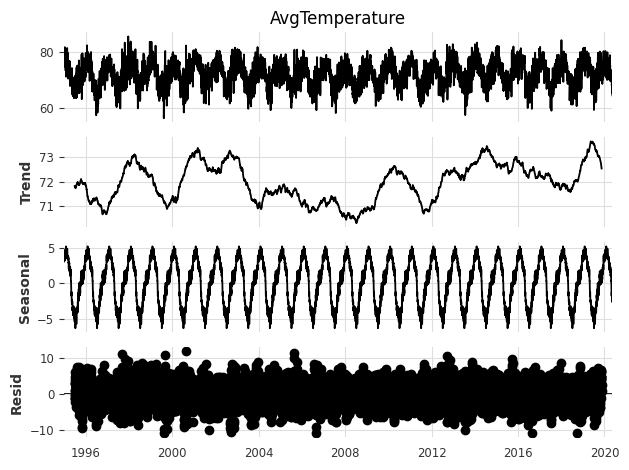

In [55]:
decomposition = seasonal_decompose(pd_series, model='additive', period=365)
decomposition.plot()

**Sazonalidade**

In [56]:
is_seasonal, period = check_seasonality(series, max_lag=365)
if is_seasonal:
    print(f"Sazonalidade detectada com período: {period}")
else:
    print("Nenhuma sazonalidade detectada")

Sazonalidade detectada com período: 17


**Testando modelos**

In [57]:
from darts.models import ExponentialSmoothing, AutoARIMA, Prophet
from darts.metrics import mape
from darts.utils.model_selection import train_test_split

In [58]:
train, test = train_test_split(series, test_size=0.2)

In [59]:
model_arima = AutoARIMA().fit(train)
model_prophet = Prophet().fit(train)
model_exp_smoothing = ExponentialSmoothing().fit(train)

forecast_arima = model_arima.predict(len(test))
forecast_prophet = model_prophet.predict(len(test))
forecast_exp_smoothing = model_exp_smoothing.predict(len(test))

10:05:13 - cmdstanpy - INFO - Chain [1] start processing
10:05:14 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
rmse = root_mean_squared_error(test.pd_dataframe(), forecast_arima.pd_dataframe()).round(2)
mae = mean_absolute_error(test.pd_dataframe(), forecast_arima.pd_dataframe()).round(2)
print(f'MSE: {mae}, RMSE: {rmse}')

MSE: 3.66, RMSE: 4.41


In [61]:
rmse = root_mean_squared_error(test.pd_dataframe(), forecast_prophet.pd_dataframe()).round(2)
mae = mean_absolute_error(test.pd_dataframe(), forecast_prophet.pd_dataframe()).round(2)
print(f'MSE: {mae}, RMSE: {rmse}')

MSE: 2.86, RMSE: 3.55


In [62]:
rmse = root_mean_squared_error(test.pd_dataframe(), forecast_exp_smoothing.pd_dataframe()).round(2)
mae = mean_absolute_error(test.pd_dataframe(), forecast_exp_smoothing.pd_dataframe()).round(2)
print(f'MSE: {mae}, RMSE: {rmse}')

MSE: 3.63, RMSE: 4.38


In [63]:
print(f'MAPE ARIMA: {mape(test, forecast_arima)}')
print(f'MAPE Prophet: {mape(test, forecast_prophet)}')
print(f'MAPE Exponential Smoothing: {mape(test, forecast_exp_smoothing)}')

MAPE ARIMA: 5.0689738755725156
MAPE Prophet: 4.052511125343401
MAPE Exponential Smoothing: 5.0750751375681995


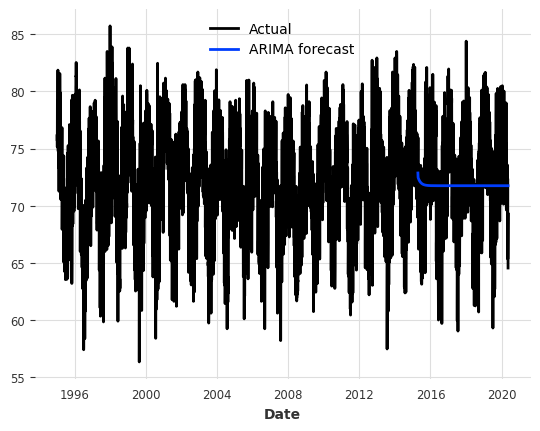

In [64]:
# Plotar as previsões
series.plot(label='Actual')
forecast_arima.plot(label='ARIMA forecast')
plt.legend()
plt.show()

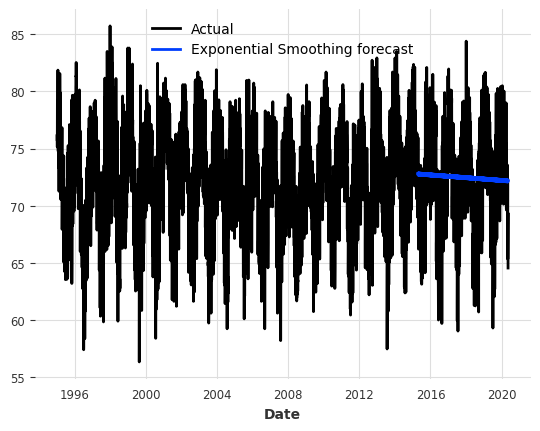

In [65]:
# Plotar as previsões
series.plot(label='Actual')
forecast_exp_smoothing.plot(label='Exponential Smoothing forecast')
plt.legend()
plt.show()

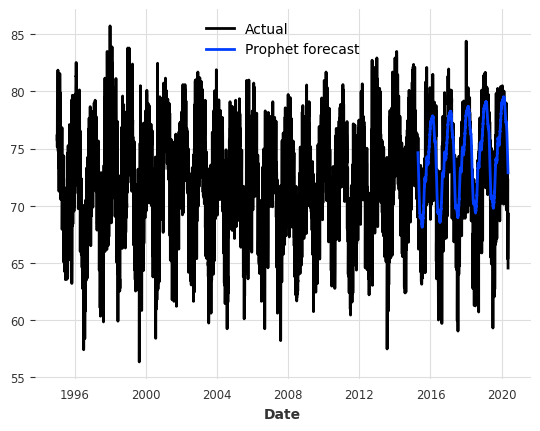

In [66]:
# Plotar as previsões
series.plot(label='Actual')
forecast_prophet.plot(label='Prophet forecast')
plt.legend()
plt.show()

## Analisando a temperatura Argentina

### Preparando dataset

In [67]:
df_ar = df[df["Country"] == "Argentina"]
df_ar.head()

Region    Country State          City  \
1231460  South/Central America & Carribean  Argentina   NaN  Buenos Aires   
1231461  South/Central America & Carribean  Argentina   NaN  Buenos Aires   
1231462  South/Central America & Carribean  Argentina   NaN  Buenos Aires   
1231463  South/Central America & Carribean  Argentina   NaN  Buenos Aires   
1231464  South/Central America & Carribean  Argentina   NaN  Buenos Aires   

         Month  Day  Year  AvgTemperature       Date  
1231460      1    1  1995            82.4 1995-01-01  
1231461      1    2  1995            75.1 1995-01-02  
1231462      1    3  1995            73.7 1995-01-03  
1231463      1    4  1995            77.1 1995-01-04  
1231464      1    5  1995            79.5 1995-01-05

In [68]:
df_ar["City"].unique()

array(['Buenos Aires'], dtype=object)

In [69]:
df_ar.loc[df["AvgTemperature"] == -99, "AvgTemperature"] = df_ar["AvgTemperature"].mean()


**Distribuição**

In [70]:
px.line(df_ar, x=df_ar["Date"], y=df_ar["AvgTemperature"])

### Features novas

**Usando relação de dias**

In [71]:
df_ar["AvgTemperature_lag365"] = df_ar["AvgTemperature"].shift(365)
df_ar["AvgTemperature_lag1"] = df_ar["AvgTemperature"].shift(1)
df_ar["AvgTemperature_lag5"] = df_ar["AvgTemperature"].shift(5)
df_ar["AvgTemperature_lag7"] = df_ar["AvgTemperature"].shift(7)
df_ar["AvgTemperature_lag14"] = df_ar["AvgTemperature"].shift(14)
df_ar["AvgTemperature_lag21"] = df_ar["AvgTemperature"].shift(21)
df_ar["AvgTemperature_lag28"] = df_ar["AvgTemperature"].shift(28)

C:\Users\franc\AppData\Local\Temp\ipykernel_25108\3351175389.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\franc\AppData\Local\Temp\ipykernel_25108\3351175389.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\franc\AppData\Local\Temp\ipykernel_25108\3351175389.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [72]:
df_ar = df_ar[["Date", "Month",
               "AvgTemperature_lag365", "AvgTemperature_lag1", "AvgTemperature_lag5",
                "AvgTemperature_lag7", "AvgTemperature_lag14", "AvgTemperature_lag21", "AvgTemperature_lag28", "AvgTemperature"]]
df_ar.head()

Date  Month  AvgTemperature_lag365  AvgTemperature_lag1  \
1231460 1995-01-01      1                    NaN                  NaN   
1231461 1995-01-02      1                    NaN                 82.4   
1231462 1995-01-03      1                    NaN                 75.1   
1231463 1995-01-04      1                    NaN                 73.7   
1231464 1995-01-05      1                    NaN                 77.1   

         AvgTemperature_lag5  AvgTemperature_lag7  AvgTemperature_lag14  \
1231460                  NaN                  NaN                   NaN   
1231461                  NaN                  NaN                   NaN   
1231462                  NaN                  NaN                   NaN   
1231463                  NaN                  NaN                   NaN   
1231464                  NaN                  NaN                   NaN   

         AvgTemperature_lag21  AvgTemperature_lag28  AvgTemperature  
1231460                   NaN                   NaN            82.4  
1231461                   NaN                   NaN            75.1  
1231462                   NaN                   NaN            73.7  
1231463                   NaN                   NaN            77.1  
1231464                   NaN                   NaN            79.5

In [73]:
df_ar.dropna(inplace=True)
df_ar.reset_index(inplace=True, drop=True)

In [74]:
df_ar.head()

Date  Month  AvgTemperature_lag365  AvgTemperature_lag1  \
0 1996-01-01      1                   82.4                 76.1   
1 1996-01-02      1                   75.1                 75.9   
2 1996-01-03      1                   73.7                 77.7   
3 1996-01-04      1                   77.1                 82.9   
4 1996-01-05      1                   79.5                 74.2   

   AvgTemperature_lag5  AvgTemperature_lag7  AvgTemperature_lag14  \
0                 72.5                 73.7                  88.8   
1                 74.0                 70.9                  72.3   
2                 77.2                 72.5                  76.2   
3                 77.1                 74.0                  79.0   
4                 76.1                 77.2                  70.4   

   AvgTemperature_lag21  AvgTemperature_lag28  AvgTemperature  
0                  70.8                  76.9            75.9  
1                  71.7                  75.5            77.7  
2                  71.0                  81.6            82.9  
3                  66.9                  75.4            74.2  
4                  72.5                  59.5            71.1

**Vendo correlação entre as features**

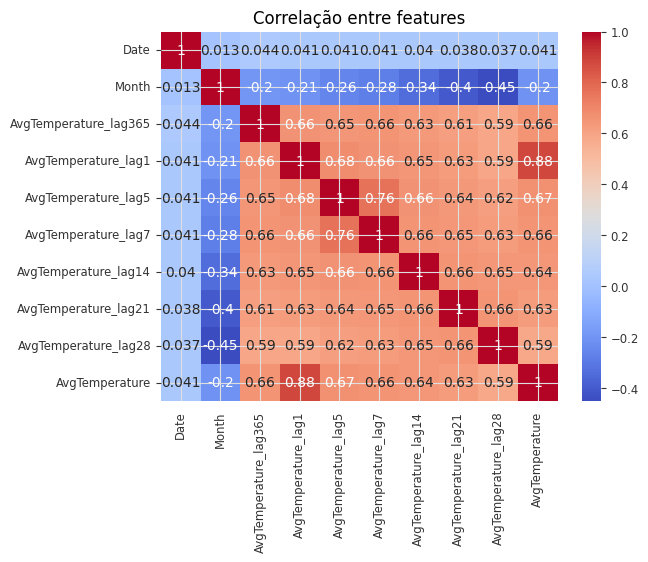

In [75]:
sns.heatmap(df_ar.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre features")
plt.show()

**Criando coluna de estação**

In [76]:
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Summer'
    elif date.month in [3, 4, 5]:
        return 'Autumn'
    elif date.month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

df_ar['Season'] = df_ar['Date'].apply(get_season)

**Correlação da coluna**

<Axes: xlabel='Season', ylabel='AvgTemperature'>

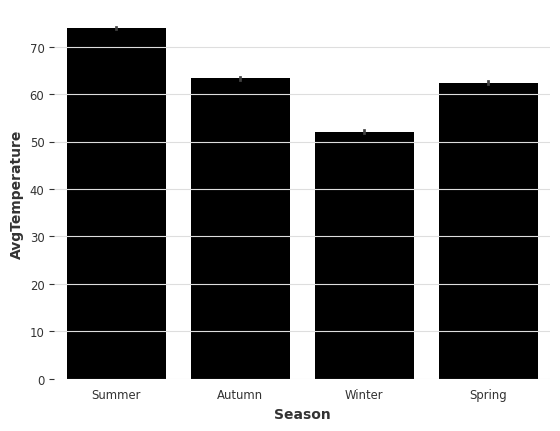

In [77]:
sns.barplot(df_ar, x="Season", y="AvgTemperature")

In [78]:
df_ar["Month"] = df_ar["Month"].astype(int)

### Treinamento

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

**Divisão dos datasets**

In [80]:
train_size = int(len(df_ar)*0.8)
train_size

7120

In [81]:
X = df_ar.drop(["Date", "AvgTemperature"], axis=1)
y = df_ar["AvgTemperature"]

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

In [82]:
X_train.columns

Index(['Month', 'AvgTemperature_lag365', 'AvgTemperature_lag1',
       'AvgTemperature_lag5', 'AvgTemperature_lag7', 'AvgTemperature_lag14',
       'AvgTemperature_lag21', 'AvgTemperature_lag28', 'Season'],
      dtype='object')

**Função de avaliação**

In [83]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def evaluate_model(y_pred, y_test):
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')

**Column Transformer**

In [84]:
num = ['Month', 'AvgTemperature_lag365',
       'AvgTemperature_lag1', 'AvgTemperature_lag5', 'AvgTemperature_lag7',
       'AvgTemperature_lag14', 'AvgTemperature_lag21', 'AvgTemperature_lag28']
cat = ['Season']

In [119]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num),
        ('cat', OneHotEncoder(), cat),
    ]
)   

**Pipeline com XGBoost**

In [120]:
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('xgb', XGBRegressor(objective="reg:squarederror"))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Month',
                                                   'AvgTemperature_lag365',
                                                   'AvgTemperature_lag1',
                                                   'AvgTemperature_lag5',
                                                   'AvgTemperature_lag7',
                                                   'AvgTemperature_lag14',
                                                   'AvgTemperature_lag21',
                                                   'AvgTemperature_lag28']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Season'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbac...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

**Avaliação**

In [121]:
y_pred = pipe.predict(X_test)
evaluate_model(y_pred, y_test)

Mean Absolute Error (MAE): 4.073100552393056
Root Mean Squared Error (RMSE): 5.05729195884172
R-squared (R²): 0.7665910641191613


In [113]:
df_comp = pd.DataFrame()
df_comp["y"] = y_test
df_comp["yp"] = y_pred

In [89]:
df_comp

y         yp
7120  55.8  51.359505
7121  47.6  51.116135
7122  53.2  48.121399
7123  48.7  54.349728
7124  43.9  49.911537
...    ...        ...
8896  61.3  54.937283
8897  67.0  60.978260
8898  62.4  66.224976
8899  52.2  61.865849
8900  46.5  52.978485

[1781 rows x 2 columns]

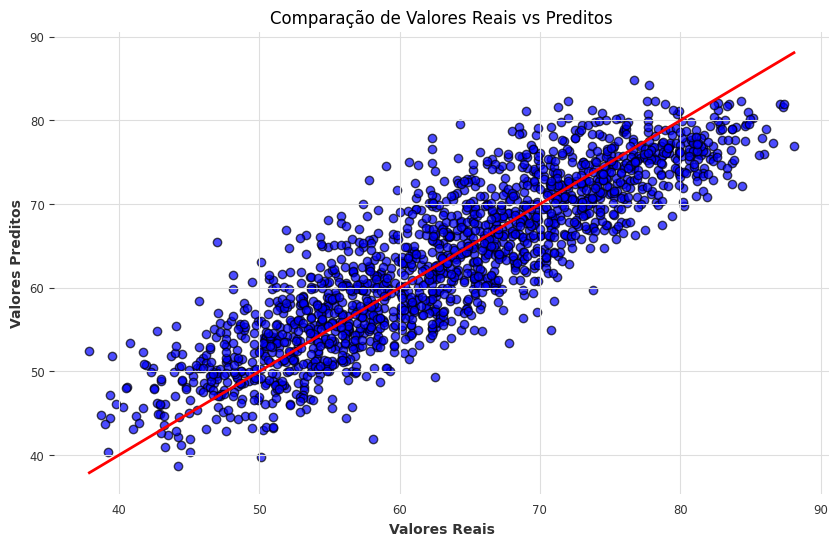

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Linha ideal de y_test = y_pred
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação de Valores Reais vs Preditos')
plt.show()

**Pipeline com RandomForest**

In [91]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num),
        ('cat', OrdinalEncoder(), cat),
    ]
)   

In [92]:
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestRegressor())])
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Month',
                                                   'AvgTemperature_lag365',
                                                   'AvgTemperature_lag1',
                                                   'AvgTemperature_lag5',
                                                   'AvgTemperature_lag7',
                                                   'AvgTemperature_lag14',
                                                   'AvgTemperature_lag21',
                                                   'AvgTemperature_lag28']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Season'])])),
                ('clf', RandomForestRegressor())])

**Avaliação**

In [93]:
y_pred = pipe_rf.predict(X_test)
evaluate_model(y_pred, y_test)

Mean Absolute Error (MAE): 3.930937552816968
Root Mean Squared Error (RMSE): 4.8524665095629285
R-squared (R²): 0.7851147928218625


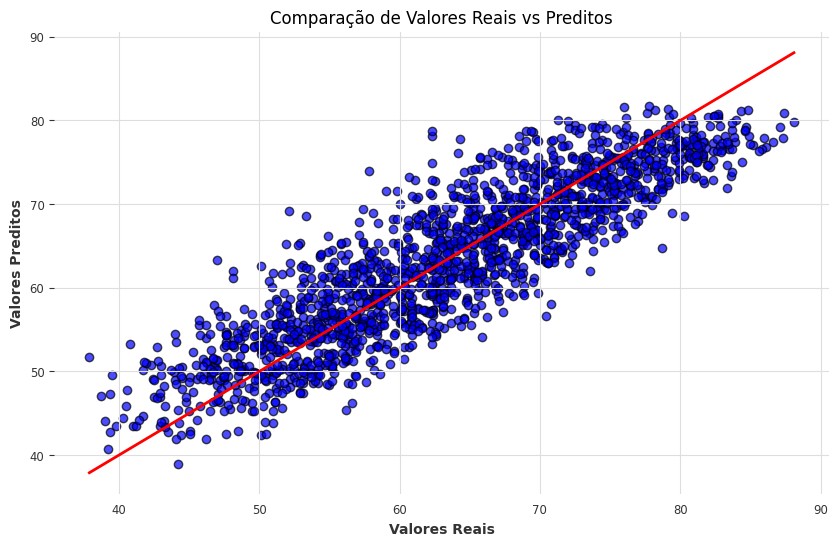

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Linha ideal de y_test = y_pred
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação de Valores Reais vs Preditos')
plt.show()

#### Hiperparametros - XGBoost

In [122]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 6, 9],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 50, 'xgb__subsample': 1.0}


In [123]:
best_model = grid_search.best_estimator_

In [124]:

y_pred = best_model.predict(X_test)
evaluate_model(y_pred, y_test)

Mean Absolute Error (MAE): 3.787147036661818
Root Mean Squared Error (RMSE): 4.678391613155849
R-squared (R²): 0.8002556190863008
